In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [186]:
df = pd.read_csv('spam.csv', encoding='latin-1')

### Data Cleaning
Data Cleaning -> Merupakan bagian proses dari data Pre-processing dimana kita membersihkan null value dan lain-lainnya.
Disini kita membersihkan data terlebih dahulu karena kita mempunyai dataset yang berhubungan dengan message

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [188]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [189]:
df.rename(columns = {'v1': 'label', 'v2': 'text'}, inplace = True)

In [190]:
df.head(5)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [191]:
from sklearn.preprocessing import LabelEncoder

In [192]:
df['label'] = LabelEncoder().fit_transform(df['label'])

In [193]:
df.head(5)

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [194]:
# Check Missing Value
df.isnull().sum()

label    0
text     0
dtype: int64

In [195]:
# Check Teks Berganda
df.duplicated().sum()

403

In [196]:
df = df.drop_duplicates(keep='first')

In [197]:
df.duplicated().sum()

0

### EDA
EDA -> Proses untuk menganalisa hubungan antar variabel untuk data yang kita akan proses

In [198]:
!pip install nltk
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\BERNARD OWENS
[nltk_data]     W\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\BERNARD OWENS
[nltk_data]     W\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

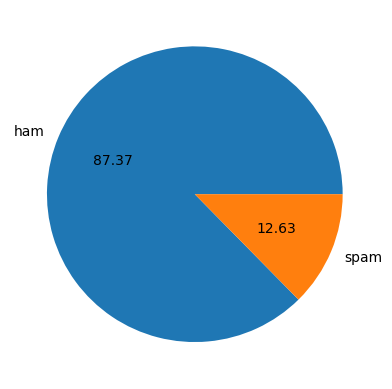

In [199]:
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'],  autopct="%0.2f")
plt.show()

In [200]:
df['Num_Char'] = df['text'].apply(len)

In [201]:
df.head(5)

,label,text,Num_Char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [202]:
df['Num_Words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [203]:
df.head(5)

,label,text,Num_Char,Num_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [204]:
df['Num_Sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [205]:
df.head(5)

,label,text,Num_Char,Num_Words,Num_Sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


disini kita tambahkan berapa banyak kalimat dalam 1 text dengan menggunakan sent_tokenize dari library nltk

In [206]:
df[['Num_Char', 'Num_Words', 'Num_Sentence']].describe()

,Num_Char,Num_Words,Num_Sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [207]:
# Berikut deskripsi untuk data yang ham
df[df['label'] == 0][['Num_Char', 'Num_Words', 'Num_Sentence']].describe()

,Num_Char,Num_Words,Num_Sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [208]:
# Berikut deskripsi untuk data yang spam
df[df['label'] == 1][['Num_Char', 'Num_Words', 'Num_Sentence']].describe()

,Num_Char,Num_Words,Num_Sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


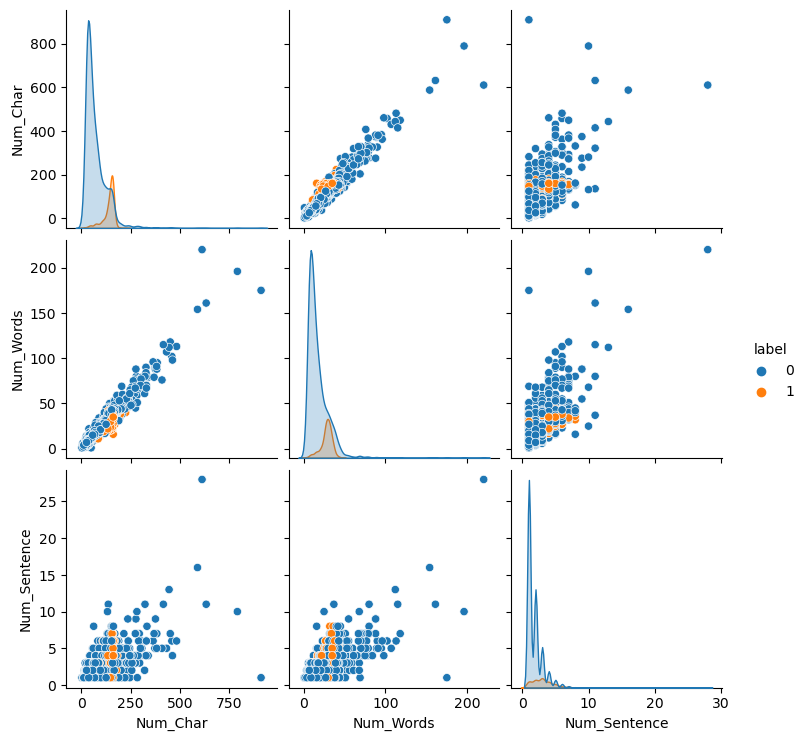

In [209]:
sns.pairplot(df, hue='label')

C:\Users\BERNARD OWENS W\AppData\Local\Temp\ipykernel_20792\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

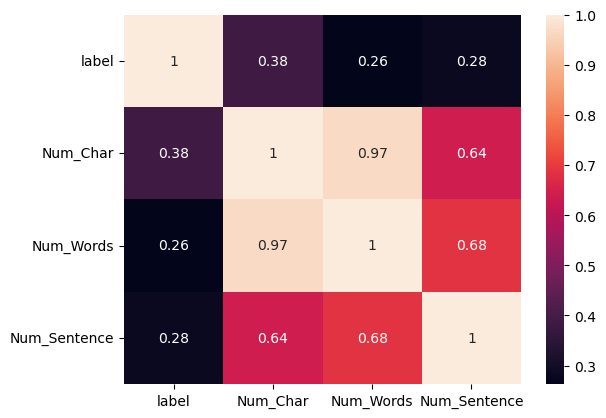

In [210]:
sns.heatmap(df.corr(),annot=True)

### Data Preprocessing
Dalam proses preprocessing ada beberapa proses yang kita akan lakukan yaitu:
- Mengubah text menjadi lower case
- Tokenizing
- Menghilangkan Special Character
- Menghilangkan stopwords dan punctuations
- Stemming

Stopwords -> kata-kata yang maknanya tidak terlalu penting dalam proses klasifikasi NLP dan bisa dihilangkan

Punctutations -> "!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"

Stemming -> Menghilangkan imbuhan

In [211]:
import string
from nltk.stem.porter import PorterStemmer
!pip install wordcloud
from wordcloud import WordCloud

In [212]:
stopword = stopwords.words('english')
punctuations = string.punctuation
porter_stemmer = PorterStemmer()

In [213]:
def tokenize_text(text):
  # Tokenizing
  texts = nltk.word_tokenize(text)
  # Hilangkan Special Character
  words = []
  for i in texts:
    if i.isalnum():
      words.append(i)
  # Hilangkan Stopword
  words = [word.lower() for word in words if word.isalpha() and word.lower() not in stopword]
  # Hilangkan Punctuation
  words = [word.lower() for word in words if word.isalpha() and word.lower() not in punctuations]
  # Stemming
  words = [porter_stemmer.stem(word) for word in words]
  return " ".join(words)

In [214]:
df['Preprocess_Text'] = df['text'].apply(tokenize_text)

In [215]:
df.head()

,label,text,Num_Char,Num_Words,Num_Sentence,Preprocess_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt may ...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Build Model

In [235]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

In [219]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['Preprocess_Text']).toarray()
y = df['label'].values

In [220]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [221]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [222]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

In [246]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)

In [247]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred3 = lr.predict(x_test)

In [248]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8733075435203095
0.5155555555555555
[[787 109]
 [ 22 116]]


In [249]:
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9564796905222437
0.8163265306122449
[[869  27]
 [ 18 120]]


In [250]:
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9661508704061895
0.9813084112149533
[[894   2]
 [ 33 105]]
